# Introduction to Dimensionality Reduction and Empirical Application

### A Project by Marc Lipfert, Matriculation Number: 3220513

### Computational Statistics (Summer Semester 2020)

## Table of Contents

[1.) Introduction](#introduction)

2.) Dimensionality Reduction Using Principal Component Analysis (PCA)

3.) Outline of the Empirical Setting

4.) Comparison of PCA and Factor Analysis

5.) Simulation Study

6.) Empirical Application to Actual Survey Data

7.) Conclusion

<a id='introduction'></a>
## 1.) Introduction

<a id='pca'></a>
## 2.) Dimensionality Reduction Using Principal Component Analysis (PCA)

This section aims to introduce Principal Component Analysis (PCA) and thereby intends to answer the following questions: In which contexts is PCA a useful tool? And what are its properties and how is it conducted? 

*(a) In which contexts is PCA a useful tool?*

PCA is essentially a dimensionality reduction method. In the case of a data set with many variables ("high dimensionality"), an empirical model based on an extensive set of variables is usually difficult to interpret. Further, the predictive performance of such a model may be poor due to overfitting. Therefore, the aim is often to create a small(er) set of new variables which capture most of the statistical information contained in the original variables. PCA intends to achieve exactly this, where those newly generated variables are called *Principal Components* and they are linear combinations of the original variables. 

To illustrate in more detail what this means and why it is done, it is useful to fix ideas and draw on a formal framework. The set-up is intended to resemble a situation that is frequently encountered in microeconometrics. Assume that a survey is conducted among randomly selected individuals. The sample size is $N$ and the econometrician is interested in the relationship between the outcome $Y$ and a set of $P$ explanatory variables $X_1 , \ldots , X_P$. The empirical model (structural equation) for an indivdidual $i$ is assumed to be as follows:

$$ Y_i = \beta_0 + \beta_1 X_{1i} + \ldots + \beta_P X_{Pi} + \epsilon_i \text{,} $$

where $\epsilon$ denotes an error term that is assumed to have a conditional expectation of zero: $E[\epsilon | X] = 0$. Using matrix notation, $ \pmb Y$ and $\pmb \epsilon$ denote column vectors each of length $N$ and $\pmb X$ is a $N \times (P + 1)$ matrix. Then, the re-written structural equation reads: 

$$ Y = \pmb X \beta + \epsilon \text{ , where } \pmb X = \begin{pmatrix} 1 & X_{11} & X_{21} & \dots & X_{P1} \\
1 & X_{12} & X_{22} & \dots & X_{P2} \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & X_{1N} & X_{2N} & \dots & X_{PN} \end{pmatrix} $$. 

The task of the econometrician is to find estimates $\hat{\beta}$ of the population parameters $\beta$, usually obtained by minimizing the sum of squared residuals (i.e. OLS).  

There are two problems that go along with high dimensional data, i.e. large $P$. First, when $N$ is only slightly larger than $P$, *overfitting* is likely to occur. In such a setting with a large number of explanatory variables relative to the sample size, the estimated coefficients of the explanatory variables might pick up on random noise rather than capturing the ("true") structural parameters. This can be viewed as an instance of the bias-variance trade-off: given standard assumptions, the numerous estimated coefficients would be unbiased but the variance of the obtained predictions would be large and thus highly dependent on the random sample that the model is fit on. Put differently, the estimated function $\hat{f}$ with coefficients $ \hat{\beta}$ would yield poor predictions (or respectively, high prediction errors) when being applied to a different random sample of the population ("test data set").

The second issue in the context of high dimensional data is the limited interpretability. Given the large number of explantory variables, a meaningful interpretation of the model may no longer be feasible. One might be inclined to interpret the estimated coefficients separately - but since high dimensionality can go along large correlations among explanatory variables, the issue of multicollinearity may render this approach useless as it cannot be pinned down which variable is truely predictive of the outcome.

Dimensionality reduction can be employed to address those two issues. Principal Component Analysis (PCA) is probably the most common method to achieve this. As already stated, it entails finding linear combinations of the explanatory variables that encapsulate as much of the statistical information ("variability") contained in the original variables as possible. The actual procedure is outlined in the following.

*(b) What are the properties of PCA and how is it conducted?*

To begin with, it is common practice to centre (or "demean") the explanatory variables, which is done as follows: 

$$ \tilde{x}_{ij} = x_{ij} - \bar{x}_j \text{,}$$

where $\bar{x}_j$ denotes the sample mean of the $j$th explanatory variable across the $N$ individuals. Importantly, this does not alter the solution besides centring it at zero. Note that when the units of measurement differ across the explanatory variables, e.g. height in cm and temperature in degree Celsius, it is advisable to go even further and standardise the variables to mean zero and standard deviation of 1. This is because of an undesirable feature that PCA has which is the sensitivity of the results to the units of measurement. A change in the units of measurement of a variable also affects its variance - and as the principal components are constructed such that they capture the greatest possible variability of the original variables, it follows that the principal components would change. This issue of standardisation will be picked up on in the following section.

We are then interested in obtaining linear combinations $Z_1, \dots, Z_M$ of the centred variables, where $M \leq P$. Those linear combinations are referred to as prinicpal components and they are ordered according to their variance in a descending fashion, thus the first principal component $Z_1$ is the linear combination of the centred explanatory variables,

$$ Z_1 = \phi_{11} \tilde{X}_1 + \phi_{12} \tilde{X}_2 + \dots + \phi_{1P} \tilde{X}_P = \sum_{j=1}^P \phi_{1j} \tilde{X}_j = \tilde{\pmb X} \phi_1 \, \text{ ,}$$

that yields the highest variance. The scalars $\phi_{11}, \phi_{12}, \dots, \phi_{1P}$ are referred to as *loadings* of the first principal component and $\phi_1$ denotes the corresponding column vector $\phi_1 = (\phi_{11} \, \phi_{12}  \, \dots \,  \phi_{1P})^T$. 

To derive the actual loadings of the first principal component, we have to note that any such linear combination has its variance given by $Var(\tilde{\pmb X} \phi)  = \phi^T \pmb S \phi$, where $\pmb S$ denotes the sample covariance matrix of the (centred) explanatory variables. Thus, the vector $\phi_1$ must be obtained, which maximises the quadratic form $\phi^T \pmb S \phi$. To ensure a well-defined solution to this problem, $\phi$ is required to be a unit-norm vector, i.e. $\phi^T \phi = 1$. Put together, the constrained maximisation problem can be written as 

$$\max_{\phi} \phi^T \pmb S \phi - \lambda (\phi^T \phi -1) \text{  .}$$

Solving this problem yields:

$$ \pmb S \phi - \lambda \phi = \pmb 0 \iff  \pmb S \phi = \lambda \phi \text{  .}$$

Thus, $\phi$ is an eigenvector of the covariance matrix $\pmb S$ and the scalar $\lambda$ denotes the corresponding eigenvalue. Since we are interested in the linear combination with the largest variance  $Z_1$, the respective loadings vector $\phi_1$ (i.e. the eigenvector) is identified by the largest eigenvalue $\lambda_1$ as 

$$ Var(\tilde{\pmb X} \phi)  = \phi^T \pmb S \phi = \lambda \phi^T \phi = \lambda \, \text{ ,}$$

using the solution of the maximisation problem. Note that this solution of the maximisation problem is unaffected if the eigenvectors $\phi$ is multiplied by (-1), so the actual signs of the loadings are meaningless - merely their respective magnitudes as well as their sign patterns matter. 

As $\pmb S$ is a symmetric $P \times P$ matrix, a total number of $P$ eigenvalues can be obtained. The corresponding eigenvectors $\phi_j$ with $j=1, \dots, P$ can be required to be orthogonal to each other, which is ensured when they satify $\phi_{j}^T \phi_{j\,'} = 1$ for $j=j\,'$ and zero otherwise. It can be shown that the remaining $2, \dots, P$ linear combinations can be found as solutions to the problem of successively maximizing the variance subject to the constraint of uncorrelatedness with previously obtained linear combinations.

In consequence, we are able to obtain $P$ linear combinations, i.e. principal components, of the $P$ centred explanatory variables - and all of these linear combinations are uncorrelated. Further, they are arranged in descending order according to their variance, which implies that the variablility of the original variables is more concentrated within the first couple of principal components. Dimensionality reduction now means, that not all of the principal components are used (otherwise no dimensionality reduction would have been achieved) but instead only the principal components up to $M < P$ are utilised. In a regression framework, this implies conducting Principal Component Regression (PCR): instead of regressing the outcome variable $Y$ on the original explanatory variables $\pmb X$, we regress it on a number of principal components:

$$ Y_i = \gamma_0 + \gamma_1 Z_{1i} + \dots + \gamma_M Z_{Mi} \, \text{ ,}$$

The crucial assumption thereby is that the directions in which the (centred) original variables have the most variability are also the directions that are associated with the outcome variable $Y$. The word "direction" is used as the vectors of principal component loadings, $\phi$, characterise a direction in a multi-dimensional space. Given that this assumption holds, using only $M$ linear combinations that contain most of the original statistical information improves upon the overfitting problem if $M << P$. Referring back to the variance-bias trade-off, we accept that a small part of the original statistical information is not used (i.e. introducting bias) while achieving a reduction of the variance of our predictions when being applied to a new random sample (test data set) which is likely to overcompensate for the introduced bias.  Further, interpretatibility of the model is increased as only a lower number of variables is included - which are also uncorrelated, so multicollinearity is no longer an issue.

The questions remains, how many principal components should be included in the regression model. A helpful concept in this context is the *proportion of variance explained* (PVE). As already stated, we intend to reduce the dimensionality of the data while preserving as much as possible of the original variability. So the PVE states how much of the total variance is captured by an individual principal component. As the explanatory variables are standardised, the total variability is calculated as follows:

$$ \sum_{j=1}^{P} Var(\tilde{X}_j) = \sum_{j=1}^{P} \frac{1}{N}\sum_{i=1}^{N} \tilde{x}_{ji}^2 \text{ .}$$

Further, the variance attributable to the $m$th principal component is 

$$ \frac{1}{N} \sum_{i=1}^{N} z_{mi}^2 = \frac{1}{N} \sum_{i=1}^{N} (\sum_{j=1}^{P} \phi_{mj} \tilde{x}_{ji})^2 \text{ .}$$

Hence, the the proportion of total variance explained by the principal component $m$ is given by:

$$ \frac{\sum_{i=1}^{N} (\sum_{j=1}^{P} \phi_{mj} \tilde{x}_{ji})^2}{\sum_{j=1}^{P} \sum_{i=1}^{N} \tilde{x}_{ji}^2} \text{ .}$$

Each PVE of the individual principal components is a positive number that lies between 0 and 1. In order to obtain the cumulative PVE up to prinipal component $M$, this would simply be the sum over the PVE of components $1, \dots, M$. Both, the PVE and the cumulative are often visualized, where especially plotting the former against the number of principal components receives particular attention and is know as a "Scree Plot" (an example will be presented in a later section).

To pin down the number of principal components to include in a PCR, a number of rather *ad-hoc* decision rules have been proposed. For instance, choosing only as many principal components as to explain a sizeable fraction of the total variance has been suggested. While it is of course context-dependent, which actual cut-off with respect to the cumulative PVE is appropriate, requiring the principal components to explain at least 70-90\% of the total variance can be seen as common practice (see Jolliffe, 112-113). A more visual approach would be to analyse the Scree Plot with the PVE on the y-axis and the number of principal components on the x-axis. By eyeballing one would identify the last principal component after which the PVE of the following ones drops off, which is sometimes referred to as an *elbow* (Hastie/Tibshirani, 384). A last example of those rather ad-hoc decision rules would be to keep those principal components with a corresponding eigenvalue $\lambda$ that is larger than the average eigenvalue $\bar{\lambda}$, or only larger than $0.7 \bar{\lambda}$ (Jolliffe, 115).

A more systematic and, as some would argue, more objective way to identify the number of principal components to include is to choose them via Cross-Validation. As already stated, our aim is to identify an empirical model which is able to explain $Y$ well. Thus, a well fitted model should be able to give good predictions of the outcome when being applied to different data that is likewise randomly drawn from the population. Overfitting is a potential issue which could lead to a situation in which the model is able to predict $Y$ well on a data set the model was trained on, but does poorly in predicting the outcome when using a test data set. One way to achieve good predictive performance on test data is to use Cross-Validation (CV). Then, the available data is randomly split into $k$ folds, commonly $k = 10$. Initially, the first fold is kept as a validation set, and the model is fit on the rest of the data, i.e. on the other $(k-1)$ folds. The quality of the estimated model $\hat{f}$ is evaluated on the held-out fold and the corresponding prediction error is calculated as the mean squared error (MSE). This procedure is repeated $k$ times, always keeping another fold as the validation set. The $k$-fold Cross-Validation estimate of the MSE is then simply the average of the obtained measures of the prediction errors: $MSE_1, \dots, MSE_k$. Referring back to the problem of selecting the appropriate number of principal components, the number would be chosen in order to achieve the lowest CV MSE.

## Lab 1
### Visualisation of the General Approach


The approach is best described when starting with low-dimensional data, such as $P = 2$, as it this can easily be visualised. For this purpose, data is drawn from a bivariate normal distribution in which the data generating process features both variables to have differing variances. Further, they have a positive covariance. The centred data as well as the two principal components are presented in the following graph.

In [1]:
library(mvtnorm)
library(ggplot2)
library(gridExtra)
library(cowplot)

#adjust size of graphs
options(repr.plot.res = 80) 
# options(repr.plot.width=4, repr.plot.height=4.5)

Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'cowplot' was built under R version 3.6.3"
********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
prco <- function(X) {
    cov <- cov(X)
    p <- dim(cov)[1]
    
    pca <- eigen(cov)
    colnames(pca$vectors) <- paste("PC", 1:p, sep="")
    rownames(pca$vectors) <- paste("X", 1:p, sep="")
    
    PVE <- pca$values / sum(apply(X, 2, var))
    cPVE <- cumsum(PVE)
    importance <- round(rbind(pca$values, PVE, cPVE), 4)
    rownames(importance)[1] <- "Var (Eigenval.)"
    colnames(importance) <- paste("PC", 1:p, sep="")
    
    vars <- cbind(paste("PC", 1:p, sep=""), pca$values)
    colnames(vars) <- c("PC", "var")
    df_vars <- data.frame(vars)
    df_vars$var <- as.numeric(as.character(df_vars$var))
    
    return(list(values=pca$values, vectors=pca$vectors, df_vars = df_vars, importance=importance))
}

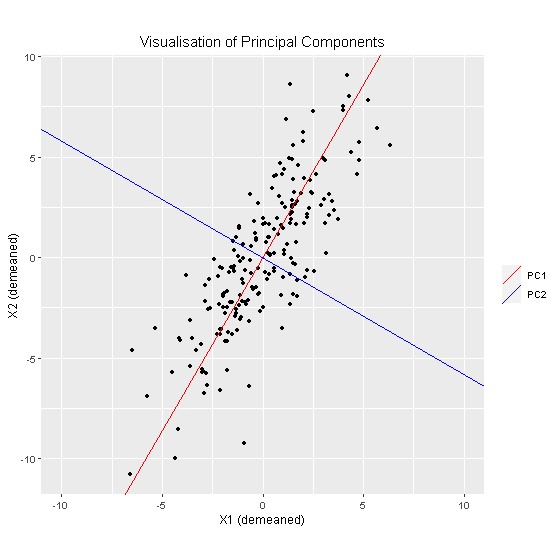

In [3]:
# Bivariate Normal Distribution

set.seed(1234)

N <- 200
sigma <- matrix(c(5, 6, 6, 12), byrow = T, nrow = 2)
mu <- c(5, 15)

X <- rmvnorm(N, mean = mu, sigma = sigma)
colnames(X) <- c("X1", "X2")
X_demeaned <- scale(X, center=T, scale = F)

df_demeaned <- as.data.frame(X_demeaned)

pca <- prco(X_demeaned)

p1 <-   ggplot(df_demeaned, aes(X1, X2)) + 
        xlim(-10, 10) +
        geom_point() + 
        geom_abline(aes(slope = pca$vectors[2, 1] / pca$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca$vectors[2, 2] / pca$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (demeaned)") + ylab("X2 (demeaned)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("Visualisation of Principal Components") +
        coord_fixed()
p1

The positive covariance of the data can be spotted as the point cloud has an upward slope. Since the first principal component is by definition the linear combination of the two variables which captures as much of their variability as possible, it also has a positive slope, thereby capturing the co-movement. The first principal component, depicted in the graph by the red line, has the property that it is the line which minimises the sum of the squared perpendicular distances between the data points and the line. The second principal component (blue line), by construction, must be orthogonal to the first one. Thus, in the two-dimension space, it is perpendicular to the first one. As can already been seen from the graph, the variability in the direction of the first principal component is in this case distinctly larger than the one in the direction of the second one. 

The numerical values of the principal component loadings are presented below. The first principal component assigns more weight to the second variable X2 than to the first variable X1 (0.86 vs. 0.5), as the former is also the one with a higher variance (see sample covariance matrix). And indeed, the first principal component captures far more of the total variability than the second one: about 92\% of the total variability is explained by it and only around 8\% by the second component.

[1] "Sample Covariance Matrix:"


,X1,X2
X1,5.3894,6.6935
X2,6.6935,13.0390


[1] "Principal Components:"


,PC1,PC2
X1,0.5019,-0.8649
X2,0.8649,0.5019


[1] "Importance of Components:"


,PC1,PC2
Var (Eigenval.),16.9235,1.5050
PVE,0.9183,0.0817
cPVE,0.9183,1.0000


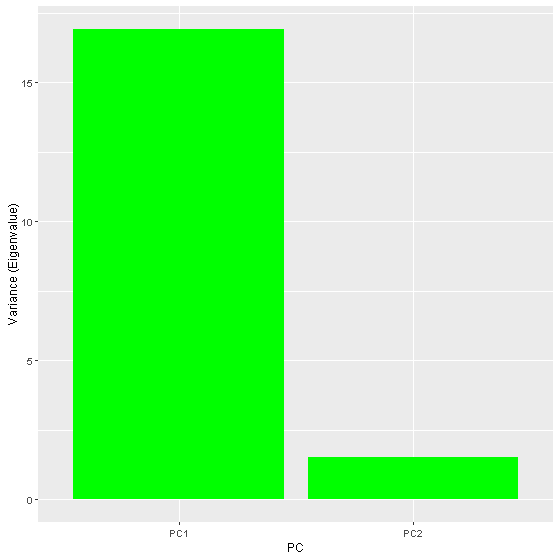

In [4]:
print("Sample Covariance Matrix:")
# Sample cov is invariant to demeaning
round(cov(df_demeaned), 4)

print("Principal Components:")
round(pca$vectors, 4)

print("Importance of Components:")
pca$importance

ggplot(data = pca$df_vars, aes(x=PC, y=var)) +
    geom_bar(stat="identity", fill="green") + ylab("Variance (Eigenvalue)")

### Standardisation


In the following, it shall be demonstrated that PCA with standardised data indeed leads to different principal components than when using data that is demeaned only. The following plot shows the demeaned data from before on the left side and the standardised version of the same underlying data on the right. As one can see, the slope of the principal components differ across panels. The first principal component with demeaned data assigned more weight to the second variable X2, which is captured by the corresponding red line having a slope larger than one, it seems that the first principal component in the case with standardised data has identical factor loadings for the two variables.

This is because standardisation alters the covariance matrix while demeaning leaves is unaffected. As the principal components are obtained as the eigenvectors of the covariance matrix, they then also differ. The covariance matrix of the standardised data is in fact the correlation matrix of the underlying data. 

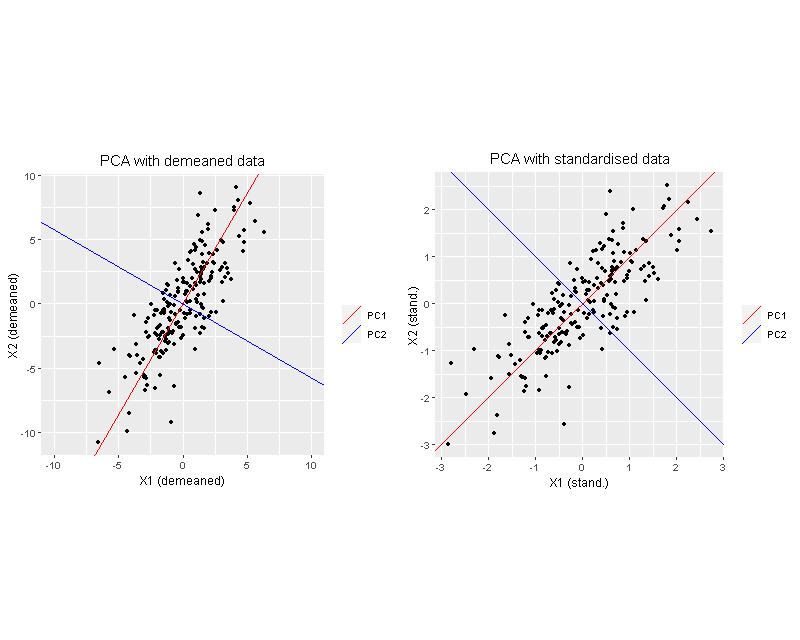

In [5]:
X_std <- scale(X, center = T, scale = T)
df_std <- as.data.frame(X_std)
pca_std <- prco(X_std)

p2 <-   ggplot(df_std, aes(X1, X2)) + 
        geom_point() + 
        geom_abline(aes(slope = pca_std$vectors[2, 1] / pca_std$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca_std$vectors[2, 2] / pca_std$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (stand.)") + ylab("X2 (stand.)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("PCA with standardised data") +
        coord_fixed()

p1 <- p1 + ggtitle("PCA with demeaned data")

options(repr.plot.width=10, repr.plot.height=8)
grid.arrange(p1, p2, nrow=1)

Below, the correlation matrix is displayed. Both variables have a high correlation of about .8 and this leads to factor loadings of the first principal component that equally weight both of the standardised variables. Still, the first component explains about 90\% of the total variance.

[1] "Sample Covariance Matrix:"


,X1,X2
X1,5.389441,6.693512
X2,6.693512,13.039028


[1] "Covariance Matrix of Standardised Data (Correlation Matrix)"


,X1,X2
X1,1.0000000,0.7984717
X2,0.7984717,1.0000000


[1] "Principal Component Loadings:"


,PC1,PC2
X1,0.7071068,-0.7071068
X2,0.7071068,0.7071068


[1] "Importance of Principal Components:"


,PC1,PC2
Var (Eigenval.),1.7985,0.2015
PVE,0.8992,0.1008
cPVE,0.8992,1.0000


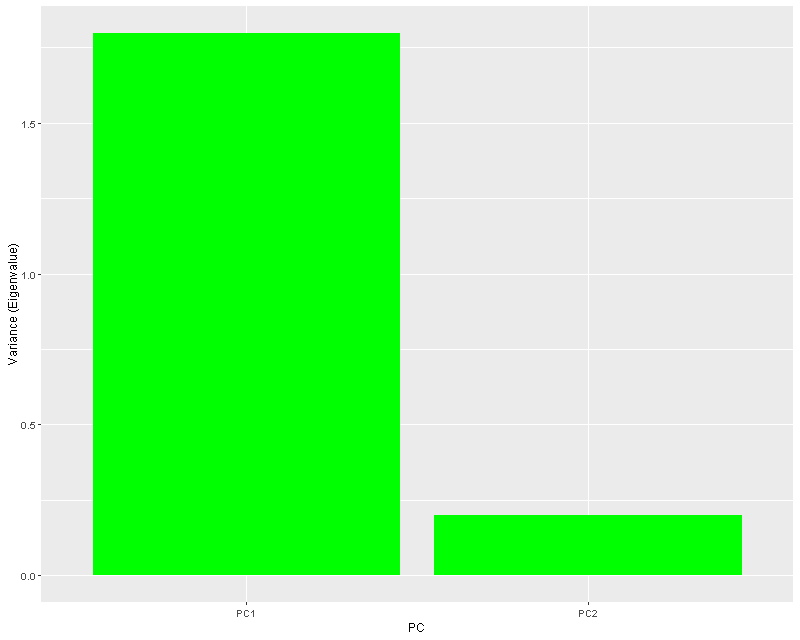

In [6]:
print("Sample Covariance Matrix:")
cov(df_demeaned)

print("Covariance Matrix of Standardised Data (Correlation Matrix)")
# Standardisation alters original Cov Matrix
cov(df_std)

print("Principal Component Loadings:")
pca_std$vectors

print("Importance of Principal Components:")
pca_std$importance

ggplot(data = pca_std$df_var, aes(x=PC, y=var)) +
    geom_bar(stat="identity", fill="green") + ylab("Variance (Eigenvalue)")

To illustrate this point more clearly, consider the bivariate case with uncorrelated variables and drastically differing variances. 

[1] "****************************"
[1] "*** Demeaned Data **********"
[1] "****************************"
[1] "Sample Covariance Matrix:"


,X1,X2
X1,11.43334373,-0.07325336
X2,-0.07325336,1.86232795


[1] "Principal Components:"


,PC1,PC2
X1,-0.999970715,-0.007652994
X2,0.007652994,-0.999970715


,PC1,PC2
Var (Eigenval.),11.4339,1.8618
PVE,0.8600,0.1400
cPVE,0.8600,1.0000


[1] "****************************"
[1] "*** Standardised Data ******"
[1] "****************************"
[1] "Covariance Matrix:"


,X1,X2
X1,1.00000000,-0.01587497
X2,-0.01587497,1.00000000


[1] "Principal Components:"


,PC1,PC2
X1,-0.7071068,-0.7071068
X2,0.7071068,-0.7071068


,PC1,PC2
Var (Eigenval.),1.0159,0.9841
PVE,0.5079,0.4921
cPVE,0.5079,1.0000


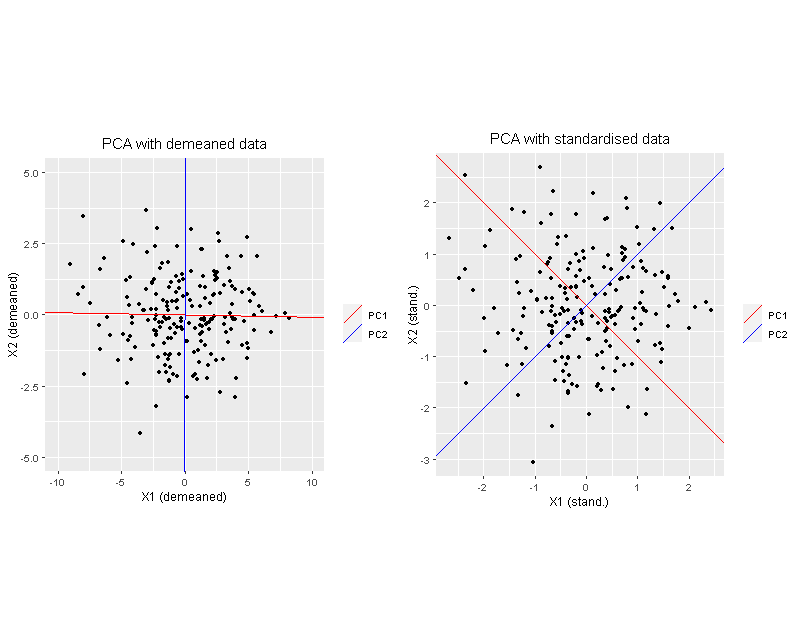

In [7]:
set.seed(1)
N <- 200
sigma <- matrix(c(12, 0, 0, 2), byrow = T, nrow = 2)
mu <- c(5, 15)

X <- rmvnorm(N, mean = mu, sigma = sigma)
colnames(X) <- c("X1", "X2")
X_demeaned <- scale(X, center=T, scale = F)

df_demeaned <- as.data.frame(X_demeaned)

print("****************************")
print("*** Demeaned Data **********")
print("****************************")
print("Sample Covariance Matrix:")
cov(df_demeaned)
print("Principal Components:")
pca <- prco(X_demeaned)
pca$vectors
pca$importance

p1 <-   ggplot(df_demeaned, aes(X1, X2)) + 
        xlim(-10, 10) + ylim(-5, 5) +
        geom_point() + 
        geom_abline(aes(slope = pca$vectors[2, 1] / pca$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca$vectors[2, 2] / pca$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (demeaned)") + ylab("X2 (demeaned)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("PCA with demeaned data") +
        coord_fixed()

print("****************************")
print("*** Standardised Data ******")
print("****************************")
X_std <- scale(X, center = T, scale = T)
df_std <- as.data.frame(X_std)
pca_std <- prco(X_std)

print("Covariance Matrix:")
cov(df_std)
print("Principal Components:")
pca_std$vectors
pca_std$importance

p2 <-   ggplot(df_std, aes(X1, X2)) + 
        geom_point() + 
        geom_abline(aes(slope = pca_std$vectors[2, 1] / pca_std$vectors[1, 1], intercept = 0, colour="PC1")) + 
        geom_abline(aes(slope = pca_std$vectors[2, 2] / pca_std$vectors[1, 2], intercept = 0, colour="PC2")) +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(color = "") + xlab("X1 (stand.)") + ylab("X2 (stand.)") +
        scale_color_manual(values = c("PC1" = "red", "PC2" = "blue")) +
        ggtitle("PCA with standardised data") +
        coord_fixed()

plot_grid(p1, p2, align = "h", nrow = 1, rel_heights = c(1, 1))

As X1 is the variable that has a much larger variance than X2 and the sample covariance between them is almost zero, the first principal component computed based on the demeaned data loads almost exclusively on X1. In other word, the first principal component is in the direction of X1, hence the red line in the left panel is essentially a flat horizontal line. About 86\% of the total variance is captured by it. In turn, the second principal component must be orthogonal which yields a vertical line. 

While the point cloud of the standardised data looks the same, the standardisation procedure takes out the difference in variance: the newly generated variables have both a variance of 1. Since the correlation between the variables is almost zero, it follows that the factor loadings of the first principal component obtained with standardised data assign almost equal weight to both of the standardised variables.

Thus, in the case of the covariance matrix approach, variables with a high variance will dominate the first principal component and one should be aware of this issue. For instance, it would actually matter whether length is measured in miles or in kilometres as this has implications for the variance of the measurements. With explanatory variables that are measured on different scales, it is therefore crucial to standardise in order to achieve scale invariance. However, one might be inclined to always standardise the variables, even if they are measured on the same scale, just to be precautious. However, the differences in variance may in fact be relevant and those high-variance variables might be more important when predicting the outcome. Hence, it is necessary to study the role of PCA in a regression context rather than as a tool for exploratory data analyses.

### Principal Component Regression (PCR)

To demonstrate the general procedure, consider the following set-up. We always draw a test and a training data set of equal size. The explanatory variables are obtained *Explain DGP*



In [8]:
gen_x <- function(N, mu) {
  
  p <- length(mu) # number of predictors
  
  # Q <- qr.Q(qr(matrix(rnorm(p^2), p))) # create an orthogonal matrix from a matrix of iid draws from N(0,1)
  # sigma <- t(Q) %*% diag(sample(1:10, p, replace = T)) %*% Q # create Cov matrix
  
  W = replicate(p, rnorm(p))
  S = W%*%t(W) + diag(runif(p),nrow=p)
  S = diag(1/sqrt(diag(S)))%*%S%*%diag(1/sqrt(diag(S))) # correlation matrix
  
  sdevs <- sample(1:2, p, replace=T)
  sigma <- diag(sdevs) %*% S %*% diag(sdevs)
  
  X_train <- rmvnorm(n=N, mean=mu, sigma=sigma)  # randomly draw training data set
  X_test <- rmvnorm(n=N, mean=mu, sigma=sigma)  # randomly draw test data set
  
  return(list(X_train=X_train, X_test = X_test, sigma = sigma))   
}

In [9]:
gen_y <- function(intercept, effects, X_train, X_test, sigma_x, PC, random, eps_sd) {
  p <- dim(sigma_x)[1]
  N_train <- dim(X_train)[1]
  N_test <- dim(X_test)[1]
  
  if (random == 1) {

    beta_vec <- sample(effects, size= p, replace=T)
    y_train <- rep(intercept, N_train) + X_train %*% beta_vec + rnorm(n=N_train, mean=0, sd=eps_sd)
    y_test <- rep(intercept, N_test) + X_test %*% beta_vec + rnorm(n=N_test, mean=0, sd=eps_sd)
  
  } else {
    stopifnot(length(effects) == length(PC))
    V <- eigen(sigma_x)$vectors[,PC]
    y_train <- rep(intercept, N_train) + X_train %*% V %*% effects + rnorm(n=N_train, mean=0, sd=eps_sd)
    y_test <- rep(intercept, N_test) + X_test %*% V %*% effects + rnorm(n=N_test, mean=0, sd=eps_sd)
  }
  return(list(y_train = y_train, y_test = y_test)) 
}

In [10]:
pcr_cv <- function(X, Y, k) {
  
  stopifnot(nrow(Y) == nrow(X))
  
  data <- cbind(Y, X)
  
  fold_i <- sample(rep(1:k, length.out = nrow(X)))
  
  mse <- matrix(NA, nrow=ncol(X), ncol=k)
  
  for (x in 1:k) {
    val_i <- which(fold_i == x)
    train <- data[-val_i,]
    val <- data[val_i,]
    
    pca <- prco(train[,-1])
    
    for (j in 1:ncol(X)) {
      Z_train <- cbind(rep(1, nrow(train)),train[,-1] %*% pca$vectors[,1:j])
      Z_val <- cbind(rep(1, nrow(val)),val[,-1] %*% pca$vectors[,1:j])
      # Z_train <- train[,-1] %*% pca$vectors[,1:j]
      # Z_val <- val[,-1] %*% pca$vectors[,1:j]
      
      beta_hat <- solve(t(Z_train)%*%Z_train) %*% t(Z_train) %*% train[,1]
      mse[j, x] <- mean((Z_val %*% beta_hat - val[,1]) ** 2)
    }
  }
  
  mse_cv <- cbind(1:ncol(X), rowMeans(mse))
  colnames(mse_cv) <- c("M", "CV-MSE")
  
  M <- match(min(mse_cv[,"CV-MSE"]), mse_cv[,"CV-MSE"])
  pca_full_train <- prco(X)
  cv_vectors <- pca_full_train$vectors[,1:M]
  
  Z <- cbind(rep(1, nrow(X)),X %*% cv_vectors)
  beta_hat <- solve(t(Z)%*%Z) %*% t(Z) %*% Y
  mse_train <- mean((Z %*% beta_hat - Y) ** 2)
  
  importance <- pca_full_train$importance[,1:M]
  
  return(list(mse_cv = mse_cv, mse_train = mse_train, beta_hat = beta_hat, M=M, cv_vectors=cv_vectors, importance=importance))
}

In [11]:
N <- 500
p <- 20
set.seed(3)
X <- gen_x(N = N, sample(10:20, p, replace = T))
X_train_d <- scale(X$X_train, center = T, scale = F)
X_test_d <- scale(X$X_test, center = T, scale = F)

y  <- gen_y(intercept=2, effects=c(5, 3), X_train = X$X_train, X_test = X$X_test, sigma_x=X$sigma, PC = c(1, 2),random = 0, eps_sd=4) 

y_train <- y$y_train
y_test <- y$y_test

pca <- prco(X_train_d)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Var (Eigenval.),10.2389,7.8445,7.1248,5.7580,5.2181,4.0953,3.7574,2.0135,1.8863,1.4748,1.3106,1.0661,0.6174,0.5423,0.3658,0.2337,0.2003,0.0669,0.0379,0.0257
PVE,0.1900,0.1456,0.1322,0.1069,0.0968,0.0760,0.0697,0.0374,0.0350,0.0274,0.0243,0.0198,0.0115,0.0101,0.0068,0.0043,0.0037,0.0012,0.0007,0.0005
cPVE,0.1900,0.3356,0.4679,0.5747,0.6716,0.7476,0.8173,0.8547,0.8897,0.9171,0.9414,0.9612,0.9727,0.9827,0.9895,0.9939,0.9976,0.9988,0.9995,1.0000


[1] "Mean Eigenvalue (Variance)"
[1] 2.693905
[1] "0.7 * (Mean Eigenvalue)"
[1] 1.885733


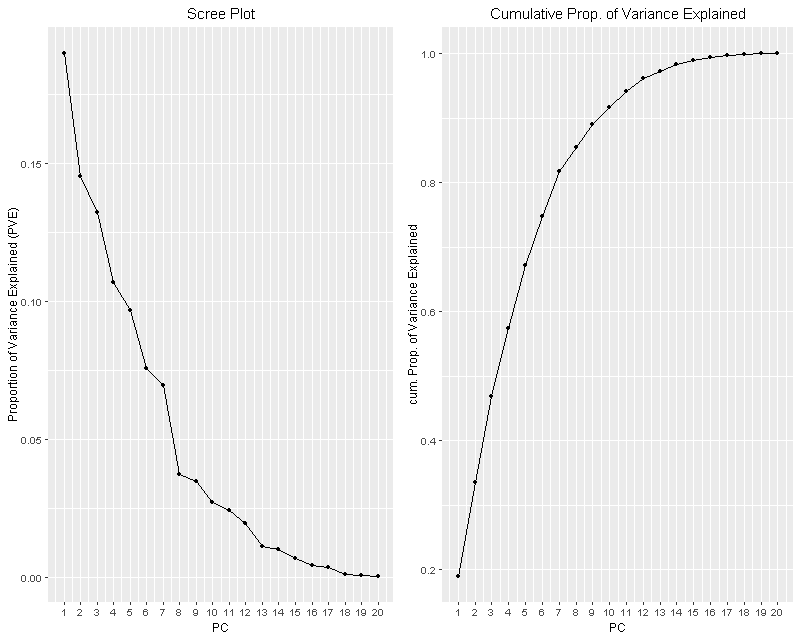

In [12]:
PVE <- pca$importance["PVE",]
cPVE <- pca$importance["cPVE",]
PC <- 1:p

p1 <- ggplot(data.frame(PC, PVE), aes(x = PC, y = PVE)) + 
      theme(plot.title = element_text(hjust = 0.5)) +
      geom_point() + geom_line() + ylab("Proportion of Variance Explained (PVE)") +
      ggtitle("Scree Plot") + scale_x_continuous(breaks = 1:p)

p2 <- ggplot(data.frame(PC, cPVE), aes(x = PC, y = cPVE)) + 
      theme(plot.title = element_text(hjust = 0.5)) +
      geom_point() + geom_line() + ylab("cum. Prop. of Variance Explained") +
      ggtitle("Cumulative Prop. of Variance Explained") + scale_x_continuous(breaks = 1:p)

plot_grid(p1, p2, align = "h", nrow = 1, rel_heights = c(1, 1))

pca$importance
print("Mean Eigenvalue (Variance)")
print(mean(pca$values))
print("0.7 * (Mean Eigenvalue)")
print(0.7 * mean(pca$values))

Keep the first XX PCs, yields about XX\% of the total variance.

Using those ad-hoc rules, the decision would be done without any consideration of the outcome variable ("unsupervised learning"). As we are interested in predicting the outcome, a supervised learning technique would be, as described above, to choose the number of principal components to include based on Cross-Validation.

In [13]:
my_pcr <- pcr_cv(X=X_train_d, Y=y_train, k=10)

print("Number of Principal Components chosen by CV:")
my_pcr$M

my_pcr$mse_cv


[1] "Number of Principal Components chosen by CV:"


[1] 7

M,CV-MSE
1,76.87639
2,26.67639
3,20.86771
4,18.26644
5,18.05803
6,17.74511
7,17.43739
8,17.58211
9,17.67557
10,17.82422


In [14]:
library(pls)

data <- cbind(y_train, X$X_train)
colnames(data) <- c("y_train", paste("X", 1:p, sep=""))
df_train_pcr <- data.frame(data)
pcr.fit <- pcr(y_train~., data=df_train_pcr, scale=F, center=T, validation="CV")
MSEP(pcr.fit)$val[1,,]
M <- which.min(MSEP(pcr.fit)$val[1,,]) - 1

print("Principal Components chosen by CV in pls package:")
print(M)

Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



(Intercept)     1 comps     2 comps     3 comps     4 comps     5 comps 
  344.57238    75.54338    26.78712    20.99024    18.05535    17.91664 
    6 comps     7 comps     8 comps     9 comps    10 comps    11 comps 
   17.40062    17.23253    17.38130    17.39570    17.45580    17.52389 
   12 comps    13 comps    14 comps    15 comps    16 comps    17 comps 
   17.58132    17.61119    17.75565    17.78232    17.79281    17.87992 
   18 comps    19 comps    20 comps 
   17.93283    17.91269    17.90168

[1] "Principal Components chosen by CV in pls package:"
7 comps 
      7 


My CV function seems to work quite ok, differences can be due to random effects in how CV is conducted

Evaluate Performance on test data set

In [15]:
mse_test_pcr <- mean((cbind(rep(1, nrow(X_test_d)), X_test_d %*% my_pcr$cv_vectors) %*% my_pcr$beta_hat -y_test) ** 2)

pcr.pred = predict(pcr.fit, X$X_test, ncomp = M)[1]
mse_pcr_c <- mean((pcr.pred - y_test) ** 2)

X_t <- cbind(rep(1, nrow(X$X_train)), X$X_train)
beta_ols <- solve(t(X_t) %*% X_t) %*% t(X_t) %*% y_train
mse_test_ols <- mean((cbind(rep(1, nrow(X$X_test)), X$X_test) %*% beta_ols - y_test)**2)

print("Test-MSE of my PCR function")
mse_test_pcr
print("Test-MSE of the PCR function of the pls package:")
mse_pcr_c
print("Test-MSE of OLS")
mse_test_ols

[1] "Test-MSE of my PCR function"


[1] 18.58647

[1] "Test-MSE of the PCR function of the pls package:"


[1] 410.6839

[1] "Test-MSE of OLS"


[1] 16.92683

Test MSE of the package is implausibly high. Test MSE of my PCR is higher than OLS - not good. Why? Although DGP is based on only the first two principal components, actually the first 7 are selected using CV... 

In [16]:

sim_func <- function(N, P, intercept, effects, PC, random_effects, eps_sd, k) {
  X <- gen_x(N = N, sample(10:20, size=P, replace = T))
  X_train_d <- scale(X$X_train, center = T, scale = F)
  X_test_d <- scale(X$X_test, center = T, scale = F)
  
  y  <- gen_y(intercept=intercept, effects=effects, PC = PC,random = random_effects, eps_sd=eps_sd, X_train = X$X_train, X_test = X$X_test, sigma_x=X$sigma) 
  y_train <- y$y_train
  y_test <- y$y_test
  
  pcr <- pcr_cv(X=X_train_d, Y=y_train, k=k)
  Z <- cbind(rep(1, nrow(X$X_test)),X_test_d  %*% pcr$cv_vectors)
  mse_test_pcr <- mean((Z %*% pcr$beta_hat - y_test) ** 2)
  
  X_t <- cbind(rep(1, nrow(X$X_test)), X$X_train)
  beta_ols <- solve(t(X_t) %*% X_t) %*% t(X_t) %*% y_train
  mse_test_ols <- mean((cbind(rep(1, nrow(X$X_test)), X$X_test) %*% beta_ols - y_test) ** 2)
  
  return(list(mse_test_ols = mse_test_ols, mse_test_pcr = mse_test_pcr,  M = pcr$M))
}

In [ ]:
reps <- 50
res <- matrix(NA, nrow=15, ncol=4)
colnames(res) <- c("true M", "MSE_OLS", "MSE_PCR", "selected M")
reps <- 50

for (m in 1:15) {
  simulation <-
    replicate(reps, sim_func(
      N = 50, 
      P = 20, 
      intercept= 0, 
      effects = sample(5:10, size=m, replace=T), 
      PC = 1:m, 
      random_effects = 0, 
      eps_sd = 2, 
      k = 5))
  
  sim <-  mapply(simulation, FUN = as.numeric)
  sim <- matrix(data = sim, ncol = reps)
  mean_values <- rowMeans(sim)
  
  res[m, 1] <- m
  res[m, 2] <- mean_values[1]
  res[m, 3] <- mean_values[2]
  res[m, 4] <- mean_values[3]
  
}

print(res)

## Asset Index as Empirical Application

Motivation:

- survey data collected in developing countries often does not contain information on hh's income or consumption expenditures
    - see Demographic and Health Survey (DHS): conducted in broad range of developing countries, "nationally-representative household surveys that provide data for a wide range of monitoring and impact evaluation indicators in the areas of population, health, and nutrition", frequently used in development studies
    - generally no information on income or expenditures, therefore a wealth index is constructed as "a composite measure of a household's cumulative living standard", "using easy-to-collect data on a household's ownership of selected assets, such as televisions and bicycles; materials used for housing construction; and types of water access and sanitation facilities. 
    
Aim:

- Construct "asset index" to proxy for "a household's long-run economic status" (Filmer/Pritchett 2001)
    - constructed usually from data on asset ownership or housing characteristics (e.g. Filmer/Pritchett 2001)
    
Choosing appropriate weights?

- equal weights (simply sum over the variables in the case of Dummy variables) has the "appeal of simplicity" but this "masks the fact that the imposition of numeric equality is completely arbitrary" (Filmer/Pritchett 2001)
- "simply adding all asset variables separately in a linear regression would implicitly create weights", but most assets may exert both an indirect (as a proxy of wealth) but also a direct effect, thus it is not possible to isolate the effect of an increase in wealth (Filmer/Pritchett 2001)

Standardization of variables. Based on the index, build percentiles: bottom 40% poor, upper 20% rich

Crucial assumption:

- hh's "long-run wealth explains the maximum variance (and covariance) in the asset variables", "no way to test this assumption directly" (Filmer/Pritchett 2001)
- "internal/external coherence" (Filmer/Pritchett 2001):
    - internal coherence: "poor" should have lower mean of assets associated with high wealth and high means for assets associated with low wealth
    - external coherence: comparison across Indian states using state-level poverty rates
- compare with consumption expenditures, when both available in the survey (Filmer/Pritchett 2001)
    
    
    

Interpretation:

- in case of dummy variables: change from 0 to 1

Factor Analysis:

- Filmer/Pritchett (2001): list FA as alternative approach and state that the ranks derived under both approaches has 0.988 Spearman rank correlation




In [18]:
taste1 <- c(rep(1, 10), rep(0, 10))
wealth1 <- c(0, 0, rep(1, 8), 0, 0, rep(1, 8))
sit1 <- cbind(wealth1, taste1)
df1 <- as.data.frame(sit1)
df1

wealth1,taste1
0,1
0,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1


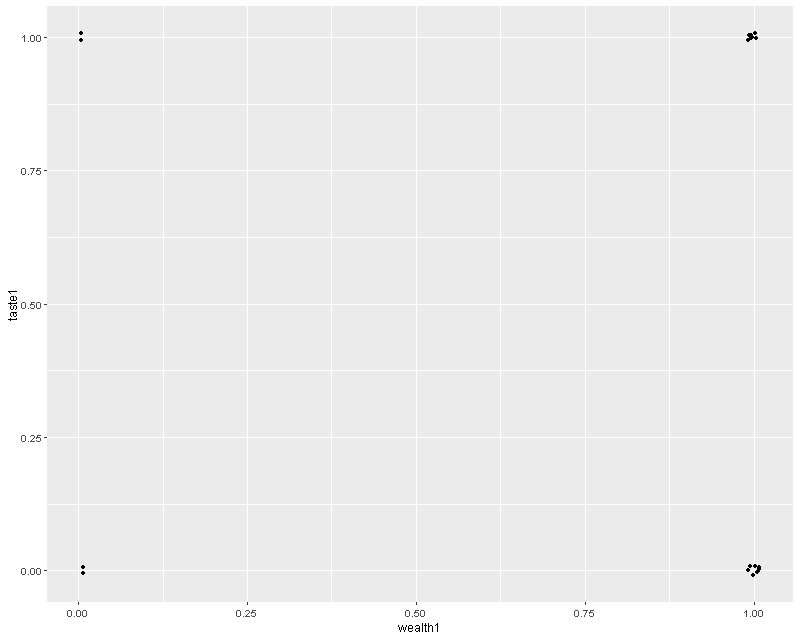

In [19]:
library(ggplot2)
ggplot(df1, aes(wealth1, taste1)) +
  geom_point(position = position_jitter(w = 0.01, h = 0.01))

In [20]:
cov(sit1)

,wealth1,taste1
wealth1,0.1684211,0.0000000
taste1,0.0000000,0.2631579


In [21]:
prcomp(sit1, center=TRUE)

Standard deviations (1, .., p=2):
[1] 0.5129892 0.4103913

Rotation (n x k) = (2 x 2):
        PC1 PC2
wealth1   0   1
taste1   -1   0

In [22]:
draw_w <- runif(2000, min = 0, max = 1)
w <- as.integer(draw_w > 4/20)
mean(w)

[1] 0.808

In [23]:
draw_t <- runif(2000, min=0, max=1)
t <- as.integer(draw_t > 0.5)
mean(t)

[1] 0.5

In [24]:
x <- cbind(w, t)
cov(x)

,w,t
w,0.155213607,0.002501251
t,0.002501251,0.250125063


In [25]:
prcomp(x, center=TRUE)

Standard deviations (1, .., p=2):
[1] 0.5001909 0.3938880

Rotation (n x k) = (2 x 2):
         PC1         PC2
w 0.02632611 -0.99965341
t 0.99965341  0.02632611

## Outline of the Empirical Setting

Over the last two decades, economic research has increasingly emphasised the role of personality traits for labour market success. One personality traits that has especeially been indentified as crucial in this context is *locus of control* (loc). This concept captures  the extent to which an
individual believes that her life can be shaped by her own actions and decisions (internal loc) or is instead contingent on outside factors beyond her control and thus on fate and luck (external loc). It stands to reason that a more internal loc may be positively associated with outcomes such as schooling and wages, as the individual feels a higher degree of control over her own course of life which may induce her to spend more effort. There is empirical evidence showing that an internal loc is predictive of wages even after controlling for education.

The crucial aspect when trying to identify the relationship between loc and wages is measurement. Personality traits cannot directly be measured, they are latent variables. However, psychologists developed 



## With Standardized Variables
To begin with, it is common practice to standardize the explanatory variables. This is because of an undesirable feature that PCA has when units of measurement are changed for at least one explanatory variables. A change in the units of measurement of a variable also affects its variance - and as the principal components are constructed such that they capture the greatest possible variability of the original variables, it follows that the principal components would also change. The standardization is conducted as follows:

$$ \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \text{,}$$

where $\bar{x}_j$ denotes the sample mean of the $j$th explanatory variable across the $N$ individuals and $s_j$ denotes the corresponding standard deviation. We are then interested in obtaining linear combinations $Z_1, \dots, Z_M$ of the standardized variables, where $M \leq P$. Those linear combinations are referred to as prinicpal components and they are ordered according to their variance in a descending fashion, thus the first principal component $Z_1$ is the linear combination of the standardized explanatory variables,

$$ Z_1 = \phi_{11} \tilde{X}_1 + \phi_{12} \tilde{X}_2 + \dots + \phi_{1P} \tilde{X}_P = \sum_{j=1}^P \phi_{1j} \tilde{X}_j = \tilde{\pmb X} \phi_1 \, \text{ ,}$$

that yields the highest variance. The scalars $\phi_{11}, \phi_{12}, \dots, \phi_{1P}$ are referred to as *loadings* of the first principal component and $\phi_1$ denotes the corresponding column vector $\phi_1 = (\phi_{11} \, \phi_{12}  \, \dots \,  \phi_{1P})^T$. 

To derive the actual loadings of the first principal component, we have to note that any such linear combination has its variance given by $Var(\tilde{\pmb X} \phi)  = \phi^T \pmb S \phi$, where $\pmb S$ denotes the sample covariance matrix of the standardized variables (which, due to the standardization, is equivalent to the correlation matrix of the original explanatory variables). Thus, the vector $\phi_1$ must be obtained, which maximises the quadratic form $\phi^T \pmb S \phi$. To ensure a well-defined solution to this problem, $\phi$ is required to be a unit-norm vector, i.e. $\phi^T \phi = 1$. Put together, the constraint maximisation problem can be written as 

$$\max_{\phi} \phi^T \pmb S \phi - \lambda (\phi^T \phi -1)$$

Solving this problem yields:

$$ \pmb S \phi - \lambda \phi = \pmb 0 \iff  \pmb S \phi = \lambda \phi$$

Thus, $\phi$ is an eigenvector of the covariance matrix $\pmb S$ and $\lambda$ the corresponding eigenvalue. Since we are interested in the linear combination with the largest variance  $Z_1$, the respective loadings vector $\phi_1$ (i.e. the eigenvector) is identified by the largest eigenvalue $\lambda_1$ as 

$$ Var(\tilde{\pmb X} \phi)  = \phi^T \pmb S \phi = \lambda \phi^T \phi = \lambda \, \text{ ,}$$

using the solution of the maximisation problem. Note that this solution of the maximisation problem is unaffected if the eigenvectors $\phi$ would be multiplied by (-1), so the actual signs of the loadings are meaningless - merely their respective magnitudes as well as their sign patterns matter. 

As $\pmb S$ is a symmetric $P \times P$ matrix, a total number of $P$ eigenvalues can be obtained. The corresponding eigenvectors $\phi_k$ with $k=1, \dots, P$ can be required to be orthogonal to each other, which is ensured when they satify $\phi_{k}^T \phi_{k'} = 1$ for $k=k'$ and zero otherwise. It can be shown that the remaining $2, \dots, P$ linear combinations can be found as solutions to the problem of successively maximizing the variance subject to the constraint of uncorrelatedness with previously obtained linear combinations.

In consequence, we are able to obtain $P$ linear combinations, i.e. principal components, of the $P$ standardized explanatory variables - and all of these linear combinations are uncorrelated. Further, they are arranged in descending order according to their variance, which implies that the variablility of the original variables is concentrated within the first couple of principal components. Dimensionality reduction now means, that not all of the principal components are used (otherwise no dimensionality reduction would have been achieved) but instead only the principal components up to $M < P$ are utilised. In a regression framework, this implies conducting Principal Component Regression (PCR): instead of regressing the outcome variable $Y$ on the original explanatory variables $\pmb X$, we regress it on a number of principal components:

$$ Y_i = \gamma_0 + \gamma_1 Z_{1i} + \dots + \gamma_M Z_{Mi} \, \text{ ,}$$

The crucial assumption thereby is that the directions in which the (standardized) original variables have the most variability are also the directions that are associated with the outcome variable $Y$. The word "direction" is used as the vectors of principal component loadings, $\phi$, characterise a direction in a multi-dimensional space. Given that this assumption holds, using only $M$ linear combinations that contain most of the original statistical information improves upon the overfitting problem if $M << P$. Referring back to the variance-bias trade-off, we accept that a small part of the original statistical information is not used (i.e. introducting bias) while achieving a reduction of the variance of our predictions when being applied to different data sets of the same kind which is likely to overcompensate for the introduced bias.  Further, interpretatibility of the model is increased as only a lower number of variables is included - which are also uncorrelated, so multicollinearity is no longer an issue.

The questions remains, how many principal components should be included in the regression model. A helpful concept in this context is the *proportion of variance explained* (PVE). As already stated, we intend to reduce the dimensionality of the data while preserving as much as possible of the original variability. So the PVE states how much of the total variance, is captured by an individual principal component. As we standardized the explanatory variables, their variance is always equal to one, so the total variance is equal to $\sum{j=1}{P} \tilde{X}_j = P$. 


In [26]:
# Set up

library(mvtnorm)

sigma <- diag(seq(3, 2))
sigma[2, 1] = 0.5
sigma[1, 2] = 0.5
sigma

X <- rmvnorm(3000, rep(0, 2), sigma)
X <- cbind(X, rnorm(3000))

cov(X)
summary(prcomp(X))

3.0,0.5
0.5,2.0


3.012768784,0.45441131,-0.005107013
0.454411312,1.93275691,-0.048279994
-0.005107013,-0.04827999,1.018541633


Importance of components:
                         PC1    PC2    PC3
Standard deviation     1.783 1.3302 1.0079
Proportion of Variance 0.533 0.2967 0.1703
Cumulative Proportion  0.533 0.8297 1.0000

In [27]:
test <- rmvnorm(2000, rep(0, 5), sigma=diag(5:1))
cov(test)

pca <- prcomp(test, center=FALSE)
pca
summary(pca)

5.06953665,-0.05254272,-0.12774616,-0.11042395,-0.06478961
-0.05254272,4.16116633,0.13416757,0.12995139,-0.05227279
-0.12774616,0.13416757,2.87919061,0.07581436,0.03986043
-0.11042395,0.12995139,0.07581436,2.01414017,-0.03951104
-0.06478961,-0.05227279,0.03986043,-0.03951104,0.97085013


Standard deviations (1, .., p=5):
[1] 2.2554053 2.0448337 1.6921449 1.4176788 0.9831186

Rotation (n x k) = (5 x 5):
             PC1         PC2         PC3         PC4         PC5
[1,] -0.99459500  0.07838311 -0.05859950  0.03060646  0.01631630
[2,]  0.07024644  0.99004030  0.10633482 -0.05765699  0.01594456
[3,]  0.06343909  0.09794736 -0.99021016 -0.07323910 -0.02239789
[4,]  0.03996011  0.06151417 -0.06578054  0.99437675  0.03881995
[5,]  0.01499669 -0.01728071 -0.02039016 -0.03987258  0.99873465

Importance of components:
                          PC1    PC2    PC3   PC4     PC5
Standard deviation     2.2554 2.0448 1.6921 1.418 0.98312
Proportion of Variance 0.3367 0.2768 0.1895 0.133 0.06397
Cumulative Proportion  0.3367 0.6135 0.8030 0.936 1.00000

In [28]:
cov2cor(cov(test))

1.00000000,-0.01143986,-0.03343709,-0.03455686,-0.02920419
-0.01143986,1.00000000,0.03876188,0.04488782,-0.02600711
-0.03343709,0.03876188,1.00000000,0.03148266,0.02384134
-0.03455686,0.04488782,0.03148266,1.00000000,-0.02825515
-0.02920419,-0.02600711,0.02384134,-0.02825515,1.00000000
